# Data Science 2 (modeling)

## Computer-exam BFVM19DATASC2 (irregular opp)

### Tue. 26 Jan 2021, 08:30-11:30, BB-Collaborate

**Materials:**

On your computer desktop you will find all data files and supplementary materials.

* `BFVM19DATASC2_I_DataScience2_1920_DSLS_HEMI-LADR-WATS.ipynb`

* `neuron.csv`

* ...

All notes, textbooks and other written reference materials are permitted.

**Instructions:**

This exam consists of three parts that can in principle be answered separately. All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

Provide your answers in the code cells corresponding with each of the questions. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment or insert a new markdown cell with your formatted text. You can receive partial credit on textual answers as well as code if you don't get the whole right answer. Be sure to explain your code through commenting, even if it doesn't work correctly.

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Submit your saved file on Blackboard using the `Assignment submission` item.
</li></ol>
</div>

***

## Part I: Graph theory <small>[30 pts]</small>

#### Question 1a <small>[5 pts]</small>

Bla bla bla

## Part II: Numerical analysis <small>[30 pts]</small>

Below, you will investigate the behavior of the *FitzHugh-Nagumo* (FHN) model that can be used to crudely model the spiking behaviour of a single neuron in the central nervous system when stimulated with excitatory input. The first-order differential equations for the FHN model read <sup>[ref](http://www.scholarpedia.org/article/FitzHugh-Nagumo_model)</sup>

$$
\begin{aligned}
\dot{V} &= V - \frac{V^3}{3} - W + I
\\
\dot{W} &= 0.08 \left( V + 0.7 - 0.8 W \right)
\end{aligned}
$$

Here, the dotted variables $\dot{V}$ and $\dot{W}$ denote the derivatives of $V$ and $W$ with respect to time $t$ (so-called Newton's notation), and

* $V$ is the neuron's membrane potential,

* $W$ is a supplementary recovery variable,

* $I$ is the magnitude of the stimulus current.

It is an example of a *relaxation oscillator* because, if the external stimulus $I$ exceeds a certain threshold value, the system will exhibit a characteristic excursion called an *action potential* before the variables $V$ and $W$ relax back to their rest values.

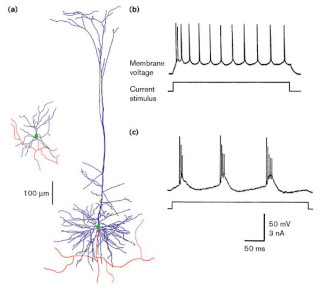

#### Question 2a <small>[9 pts]</small>

Integrate the FHN model using the *Midpoint* method from the Runge-Kutta family of integration methods. Employ starting values $V=W=0$ and a step size $\Delta t = \frac{1}{2}$, and plot the membrane potential $V(t)$ from $t_0=0$ to $t_1=300$ that you obtain for no ($I=0.0$), weak ($I=0.3$) or strong ($I=0.6$) stimulus currents in a single graph.

What is the order of the Midpoint method?

<div class="alert alert-info"><b>Hint:</b><br />Modify your implementation of Heun's method to obtain the Midpoint method.</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def FHN(x, y, I = 0):
    return np.array([
        y[0] - (y[0]**3)/3 - y[1] +I , 
        0.08*(y[0] + 0.7 - 0.8*y[1])
    ])

In [6]:
def midpoint(f, y0, x0, x1, steps, I):
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        k1 = f(x, y, I)
        k2 = f(x + (h/2), y + (h/2)*k1, I)
        
        y = y + h*(k2)
        ys.append(y)
    return  xs, ys
    

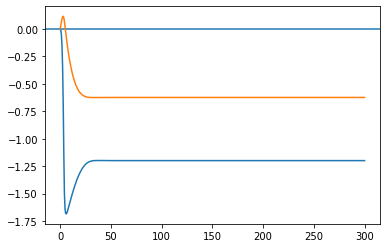

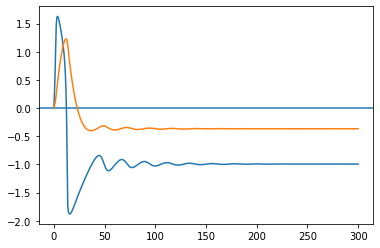

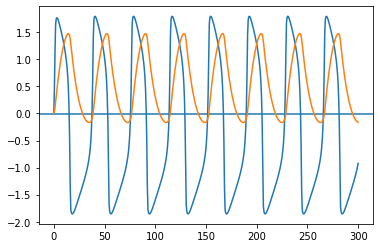

In [69]:
I = [0, 0.3, 0.6]
for i in I:
    xs, ys = midpoint(FHN, np.array([0.0, 0.0]), 0, 300, 501, i)
#     print(ys)
    plt.axhline(-0.0019242265446122067)
    plt.plot(xs, ys)
    plt.show()

<div class="alert alert-danger"><b>Note:</b><br />If you did not succeed in calculating neural signals according to the FHN model, import substitute data using `pandas.read_csv('./neuron.csv')`.</div>

#### Question 2b <small>[7 pts]</small>

The average value $\bar{V}$ of the continuous signal $V(t)$ over an arbitrary interval $(t_0, t_1)$ can be determined by the expression

$$
\bar{V} = \frac{\int_{t_0}^{t_1} V(t) \text{d}t}{t_1-t_0}
$$

Given the sampled values $V(t)$ that you determined in **2a.**, determine the average value $\bar{V}$ of the membrane potential $V(t)$ between $t_0=100$ and $t_1=300$ for each of the three stimulus currents $I=0.0,0.3,0.6$ using *Simpson's integration rule* and report the three outcomes using three decimals.

Would you generally prefer Simpson's rule to the trapezoidal rule? Explain why.

In [11]:
def simpson(f, a, b, r, n=100):
    """df = simpson(f, a, b, n=...).
    Calculates the definite integral of the function f(x)
    from a to b using the composite Simpson's
    rule with n subdivisions (with default n=...).
    """
    
    n += n % 2 # force to be even
    
    h = (b -a) / n 
    
    I = f(a, r) + f(b, r)
    
    for i in range(1, n, 2):
        xi = a + i*h
        I += 4*f(xi, r)
        
    for i in range(2, n, 2):
        xi = a + i*h
        I += 2*f(xi, r)
    I *= h/3
    
    return I

In [61]:
def V(b, r):
    

    prey = []
    x, res = midpoint(FHN, np.array([0.0, 0.0]), 0, b, 501, r)
    for i in range(len(res)):
        prey.append(res[i][0])

    return prey[::-1][0]
      

In [62]:
for i in I:
    print('I:',i)
    print(  simpson( V, a = -2, b = 0, r =  i)/200)

I: 0
-0.00024738658669877826
I: 0.3
-0.0019242265446122067
I: 0.6
-0.003666881535684628


#### Question 2c <small>[7 pts]</small>

For sufficiently high values of the stimulus $I$, the system shows oscillatory behavior, whereas below a certain critical threshold it quickly achieves a stable equilibrium close to $V(t) \approx -1$ in which no excursions occur. The fact that $V$ and $W$ are stationary in such an equilibrium implies that $\dot{V}=\dot{W}=0$. The second FHN equation $\dot{W} = 0.08 \left( V + 0.7 - 0.8 W \right) = 0$ then results in $W = (V+0.7) / 0.8$, which can be substituted into the first FHN equation to obtain

$$
V - \frac{V^3}{3} - \frac{V+0.7}{0.8} + I = 0
$$

Find the static solution for the above equality for $V$ near -1 for $I=0.0$, $0.3$, and $0.6$ to at least 3 digits accuracy.

Do your results agree with those from **2b.**? Explain your observations.

In [70]:
def func(x, I):
    return x - (x**3)/3 - (x -0.7)/0.8 + I
x = np.linspace(-5, 5, 400)

In [71]:
def rootsearch(f, a, b, steps, r):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps
    f_lo = f(a, r)
    for step in range(steps):
        lo = a + step * h
        hi = lo + h
        f_hi = f(hi, r)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi

I: 0


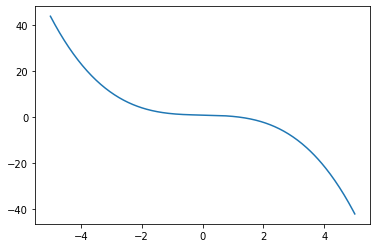

[(1.1960000000000002, 1.2000000000000002)]
I: 0.3


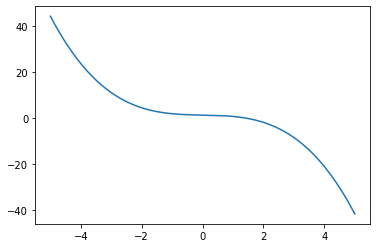

[(1.3559999999999999, 1.3599999999999999)]
I: 0.6


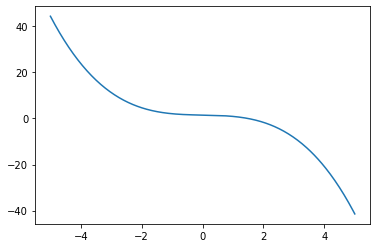

[(1.488, 1.492)]


In [72]:
for i in I:
    print('I:', i)
    plt.plot(x, func(x, i))
    plt.show()
    
    print(list(rootsearch(func, -2, 2, 1000, i)))

#### Question 2d <small>[7 pts]</small>

Determine the time $t_\text{min} > 0$ when the first minimum in the signal $V(t)$ occurs. Again, find the separate solutions for $I=0.0$, $0.3$, and $0.6$ to at least 3 digits accuracy. You may choose any preferred minimization algorithm; briefly motivate your choice.

<div class="alert alert-info"><b>Hint:</b><br />Write a helper function that integrates the model from $t_0=0$ to a requested end time $t_1$ and that returns the value $V(t_1)$. Next, determine the first minimum of this helper function.</div>

## Part III: Multivariate Component Analysis <small>[30 pts]</small>

#### Question 3a <small>[10 pts]</small>

Bla bla bla

***

## End of this exam

<div class="alert alert-warning">See the instructions at the top of this document for how to submit your answers.</div>

*Success!*